<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Классификация-MNIST" data-toc-modified-id="Классификация-MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Классификация MNIST</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Автор:-Радослав-Нейчев,-https://t.me/s/girafe_ai" data-toc-modified-id="Автор:-Радослав-Нейчев,-https://t.me/s/girafe_ai-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Автор: <a href="https://www.linkedin.com/in/radoslav-neychev/" rel="nofollow" target="_blank">Радослав Нейчев</a>, <a href="https://t.me/s/girafe_ai" rel="nofollow" target="_blank">https://t.me/s/girafe_ai</a></a></span></li></ul></li></ul></li><li><span><a href="#Сдача-задания" data-toc-modified-id="Сдача-задания-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Сдача задания</a></span></li></ul></li></ul></div>

## Классификация MNIST

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), https://t.me/s/girafe_ai

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

Давайте обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В этом задании мы воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплайн обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку с первого занятия.

Мы настоятельно рекомендуем писать код «с нуля», лишь изредка подглядывая в готовые примеры, а не просто «копировать-вставлять». Это поможет вам в будущем.

Text(0.5, 1.0, 'Image label: 0')

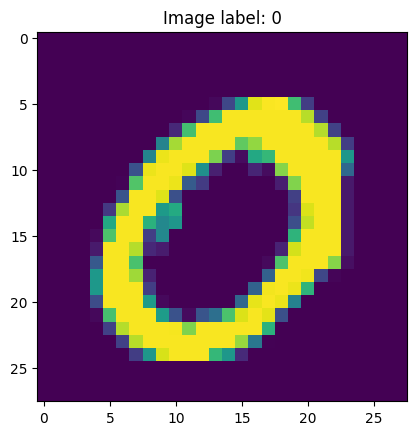

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель, представленную ниже. Пожалуйста, не создавайте чрезмерно сложную сеть — она не должна быть глубже четырёх слоёв (можно и меньше). Ваша основная задача — обучить модель и добиться как минимум 92% точности на тестовой выборке (hold-out выборке).

*Примечание: линейных слоёв и функций активации должно быть достаточно.*

__Обратите внимание, ваша модель должна быть представлена переменной `model`__

In [3]:
# Creating model instance
model = None # your code here

In [4]:
# Solution
# Creating model instance

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

Ниже доступны локальные тесты для проверки вашей модели:

In [5]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Обучите модель на обучающей выборке. Рекомендуем поэкспериментировать с различными оптимизаторами.


In [6]:
# your code here

In [9]:
# Solution
# Function to calculate accuracy

def get_accuracy(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0  # Initialize the count of correct predictions
    total = 0    # Initialize the total number of examples

    with torch.no_grad():  # Disable gradient calculation
        for images, labels in data_loader:
            outputs = model(images)  # Get predictions from the model
            _, predicted = torch.max(outputs.data, 1)  # Get the indices of the classes with the highest scores
            total += labels.size(0)  # Update the total number of examples
            correct += (predicted == labels).sum().item()  # Count the number of correct predictions

    accuracy = correct / total  # Calculate accuracy
    return accuracy  # Return the accuracy


In [10]:
# Solution
# Definition of loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Solution
# Training the model

num_epochs = 10   # Number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch in train_data_loader:
        images, labels = batch

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate loss
        loss = loss_fn(outputs, labels)

        # Backward pass and update weights
        loss.backward()
        optimizer.step()

    # Output training process information
    train_acc = get_accuracy(model, train_data_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_acc:.4f}")

Epoch [1/10], Loss: 0.0242, Train Accuracy: 0.9828
Epoch [2/10], Loss: 0.0566, Train Accuracy: 0.9807
Epoch [3/10], Loss: 0.0235, Train Accuracy: 0.9896
Epoch [4/10], Loss: 0.0070, Train Accuracy: 0.9918
Epoch [5/10], Loss: 0.0025, Train Accuracy: 0.9906
Epoch [6/10], Loss: 0.0109, Train Accuracy: 0.9960
Epoch [7/10], Loss: 0.0520, Train Accuracy: 0.9947
Epoch [8/10], Loss: 0.0026, Train Accuracy: 0.9949
Epoch [9/10], Loss: 0.0043, Train Accuracy: 0.9960
Epoch [10/10], Loss: 0.0164, Train Accuracy: 0.9950


Также помните, что вы всегда можете обратиться к отличной [документации](https://pytorch.org/docs/stable/index.html) и [учебным материалам](https://pytorch.org/tutorials/).

Оценим качество классификации:

In [12]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [13]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.99495


In [14]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [15]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9805


Проверка, что пороги пройдены:

In [16]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

Обращаем внимане, код ниже предполагает, что ваша модель имеет содержится в переменной `model`, а файл `hw_mnist_data_dict.npy` находится в той же директории, что и ноутбук (он доступен в репозитории).

In [18]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw_mnist_data_dict.npy'), 'Please, download `hw_mnist_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw_mnist_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_mnist_task_1.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_mnist_task_1.json`')
# __________end of block__________

File saved to `submission_dict_mnist_task_1.json`


### Сдача задания
Сдайте сгенерированный файл в соответствующую задачу в соревновании, а именно:
    
* `submission_dict_mnist_task_1.json` в задачу Warmup (hw_mnist)

На этом задание завершено. Поздравляем!